In [1]:
# Importing Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the files
test_path = '../input/titanic/test.csv'
train_path = '../input/titanic/train.csv'
gs_path = '../input/titanic/gender_submission.csv'
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)
survived = pd.read_csv(gs_path)

In [3]:
# Train Data
print('Train Data : \n')
train_df.head()

Train Data : 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Test Data
print('Test Data : \n')
test_df.head()

Test Data : 



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Gender Submission Data
print('Survived Data : \n')

survived.head()

Survived Data : 



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Exploratory Data Analysis
Here we will look into various data columns and explore them. Process such as Data Visualisation includes Correlation, Plots and many more will be used. 

# Data Analysis and Visualization

In [6]:
# Necessary Informations on the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**So we have 891 rows and 12 columns. The columns are of 3 datatypes as int64, float64 and objects.**

In [7]:
# Checking the null values in both train and test data.
print("Null values in train data: ",train_df.isna().sum().sum())
print("Null values in test data: ", test_df.isna().sum().sum())

Null values in train data:  866
Null values in test data:  414


So we do have null values. Let us dive more into it. First we consider about **train data**

In [8]:
train_df.isna().sum()[5]

177

In [9]:
Total = train_df.isna().sum().sort_values(ascending = False)
pert = Total / train_df.isna().count().sort_values(ascending = False)
pert = round(pert , 1).sort_values(ascending = False)
Missing_values = pd.concat([Total, pert], keys = ('Total', '%'), axis = 1)
Missing_values

,Total,%
Cabin,687,0.8
Age,177,0.2
Embarked,2,0.0
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


Clearly we can see that Cabin and Age have maximum number of missing values. We will handle the missing values of these columns later on. However we can check *Embarked* column that it has only 2 missing values, so we fill these before diving into data visualization.

In [10]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

It basically is an object datatype. "S" has the most number of occurrances, we will fill the missing values with the "S" value.

In [11]:
train_df['Embarked'] = train_df["Embarked"].fillna("S")

In [12]:
train_df['Embarked'].isna().sum()

0

So we got rid of the missing values, now let us check some more infomation on the "Embarked" columns

In [13]:
train_df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

So we get the info that the port with the least amount of passengers boarded is "Q". That is Queenstown. 

In [14]:
# Setting PassengerId as index
train_df.set_index('PassengerId')
test_df.set_index('PassengerId')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## Data Visualization

Let us deep dive into relations between each and every dataset columns

In [15]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

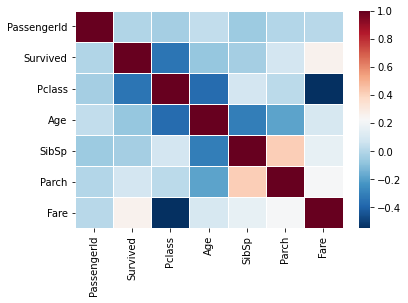

In [16]:
ax = train_df.corr()
sns.heatmap(ax, cbar= True, cmap = "RdBu_r", linewidth = .5)

In [17]:
# We can derive from the above heatmap that SibSp and Parch are the most related,
## However to a surprise Fare and pclass are the least correlated.
## Let us now find the relations between 2 or more columns one by one.

## 1. Age Column

### 1.1 Age, Fare and Survived
We will first check the datatypes of each of these columns and then plot the graphs.

In [18]:
train_df[['Age','Fare','Survived']].info()
print("-----------------\n")
print(train_df[['Age','Fare','Survived']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB
-----------------

              Age        Fare    Survived
count  714.000000  891.000000  891.000000
mean    29.699118   32.204208    0.383838
std     14.526497   49.693429    0.486592
min      0.420000    0.000000    0.000000
25%     20.125000    7.910400    0.000000
50%     28.000000   14.454200    0.000000
75%     38.000000   31.000000    1.000000
max     80.000000  512.329200    1.000000


The 'Age' and 'Fare' columns are of float type, while 'Survived' is of int type
Key Points : 
1. The average age was around 30 years in the dataset
2. The age ranged from 0.4 to 80 years
3. The mean fare was around 32 dollars
4. The max. fare was around 512 dollars
5. There was about 38% passengers that survived the titanic disaster in the dataset

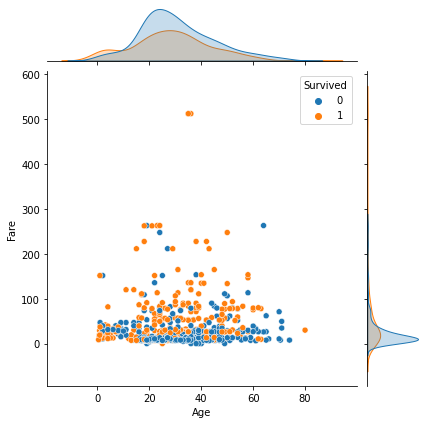

In [19]:
# Plotting Age and Fare 
sns.jointplot(data = train_df , x = 'Age' , y = 'Fare' , hue = 'Survived')

Clearly, we can see that the very few people with higher fare and aged between 20 - 40 have survived. However we want more clear understanding of survival rate in relation with lower fare rates and different age groups.

### 1.2 Age, Sex and Survived

In [20]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

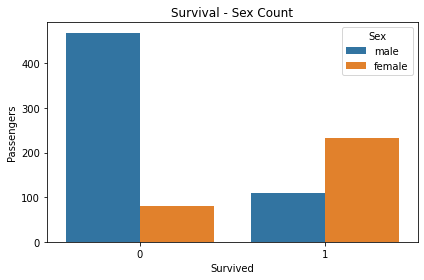

In [21]:
# Relation between Sex and Survived
fig , ax = plt.subplots()
ax = sns.countplot(x = train_df['Survived'], hue = train_df['Sex'])

ax.set_ylabel("Passengers")
ax.set_title("Survival - Sex Count")
plt.tight_layout()
plt.show()

Here we observe that more number of females have survived than male. Let us get an exact figure on how many females have survived than male

In [22]:
grp_sex = train_df.groupby('Sex')
male = train_df['Sex'] == 'male'
female = train_df['Sex'] == 'female'
male_s = (train_df['Survived'][male] == 1).dropna().sum()
msp =  round((male_s / (train_df['Survived'][male]).dropna().count() * 100), 2)
Male = pd.Series([male_s , msp], index = ['Survived', 'Percentage'])

female_s = (train_df['Survived'][female] == 1).dropna().sum()
fsp = round((female_s / train_df['Survived'][female].dropna().count()*100) , 2)
Female = pd.Series([female_s , fsp], index = ['Survived' , 'Percentage'])
Female

surrate = pd.concat([Male , Female] , keys = ('Male' , 'Female') , axis =1)
surrate

,Male,Female
Survived,109.00,233.0
Percentage,18.89,74.2


So around 74% of females who have boarded the cruise have survived the titanic disaster.

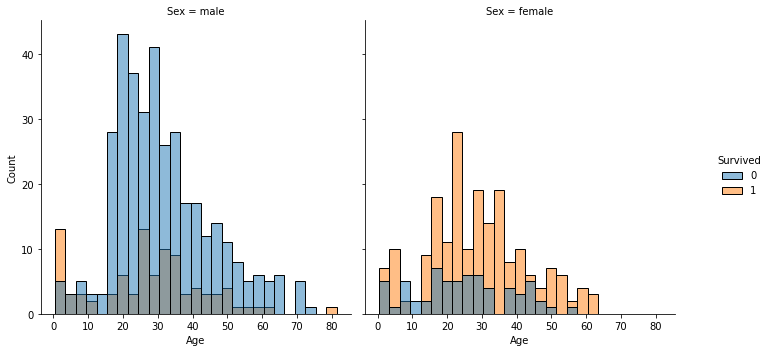

In [23]:
sns.displot(data = train_df , x = 'Age' , col = 'Sex' , hue = 'Survived' , binwidth=3,height = 5,facet_kws=dict(margin_titles=True))

From what we can observe, Male of aged between 1 to 

## 2. Parch and SibSp

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


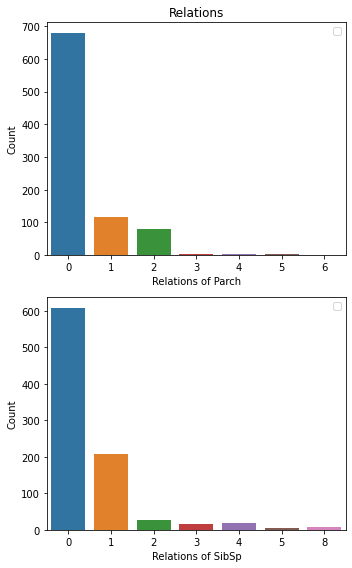

In [24]:
# We will see a relation between Parch and SbSp 
print(train_df.columns)
fig , axes = plt.subplots(nrows = 2 , ncols =1 , sharex = False, figsize=(5,8))
ax = sns.countplot(x = 'Parch' , data = train_df , ax = axes[0])
ax.legend()
ax.set_title('Relations')
ax.set_xlabel('Relations of Parch')
ax.set_ylabel('Count')
ax = sns.countplot(x='SibSp' , data = train_df , ax = axes[1])
ax.legend()
ax.set_xlabel('Relations of SibSp')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


**Observations from above plotting**
1. More than 650 passengers have 0 Parent-Child Relationship
2. Around 600 passengers have 0 Sibling - Spouse Relationship
3. Around 100 passengers have 1 Parch relationships. That means they had either 1 parent or 1 child.
4. From SibSp, we see that 200 passengers have 1 SibSp relations, we may conclude that these are basically spouses.

#### 2.1 Parch, SibSp and Survival Rate Analysis

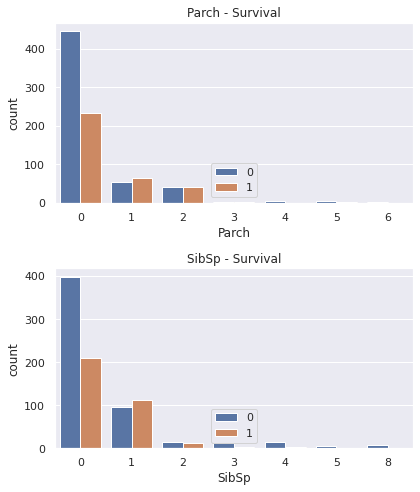

In [25]:
sns.set_theme(style = 'darkgrid')
fig ,axes = plt.subplots(nrows=2, ncols=1, figsize = (6,7))
ax = sns.countplot(data = train_df, x= 'Parch' , hue = 'Survived' , ax = axes[0])
ax.legend()
ax.set_title('Parch - Survival')

ax = sns.countplot(data = train_df, x = 'SibSp', hue='Survived', ax = axes[1])
ax.legend()
ax.set_title('SibSp - Survival')

plt.tight_layout()
plt.show()

We could say from the above illustration that :
1. SibSp and Parch of **0 relations** have **far less chance of survival**.
2. Parch and SibSp of **1 relation** had **more chances of survival.** 
3. The other relational parameters have far lesses chance of surviving the disaster.

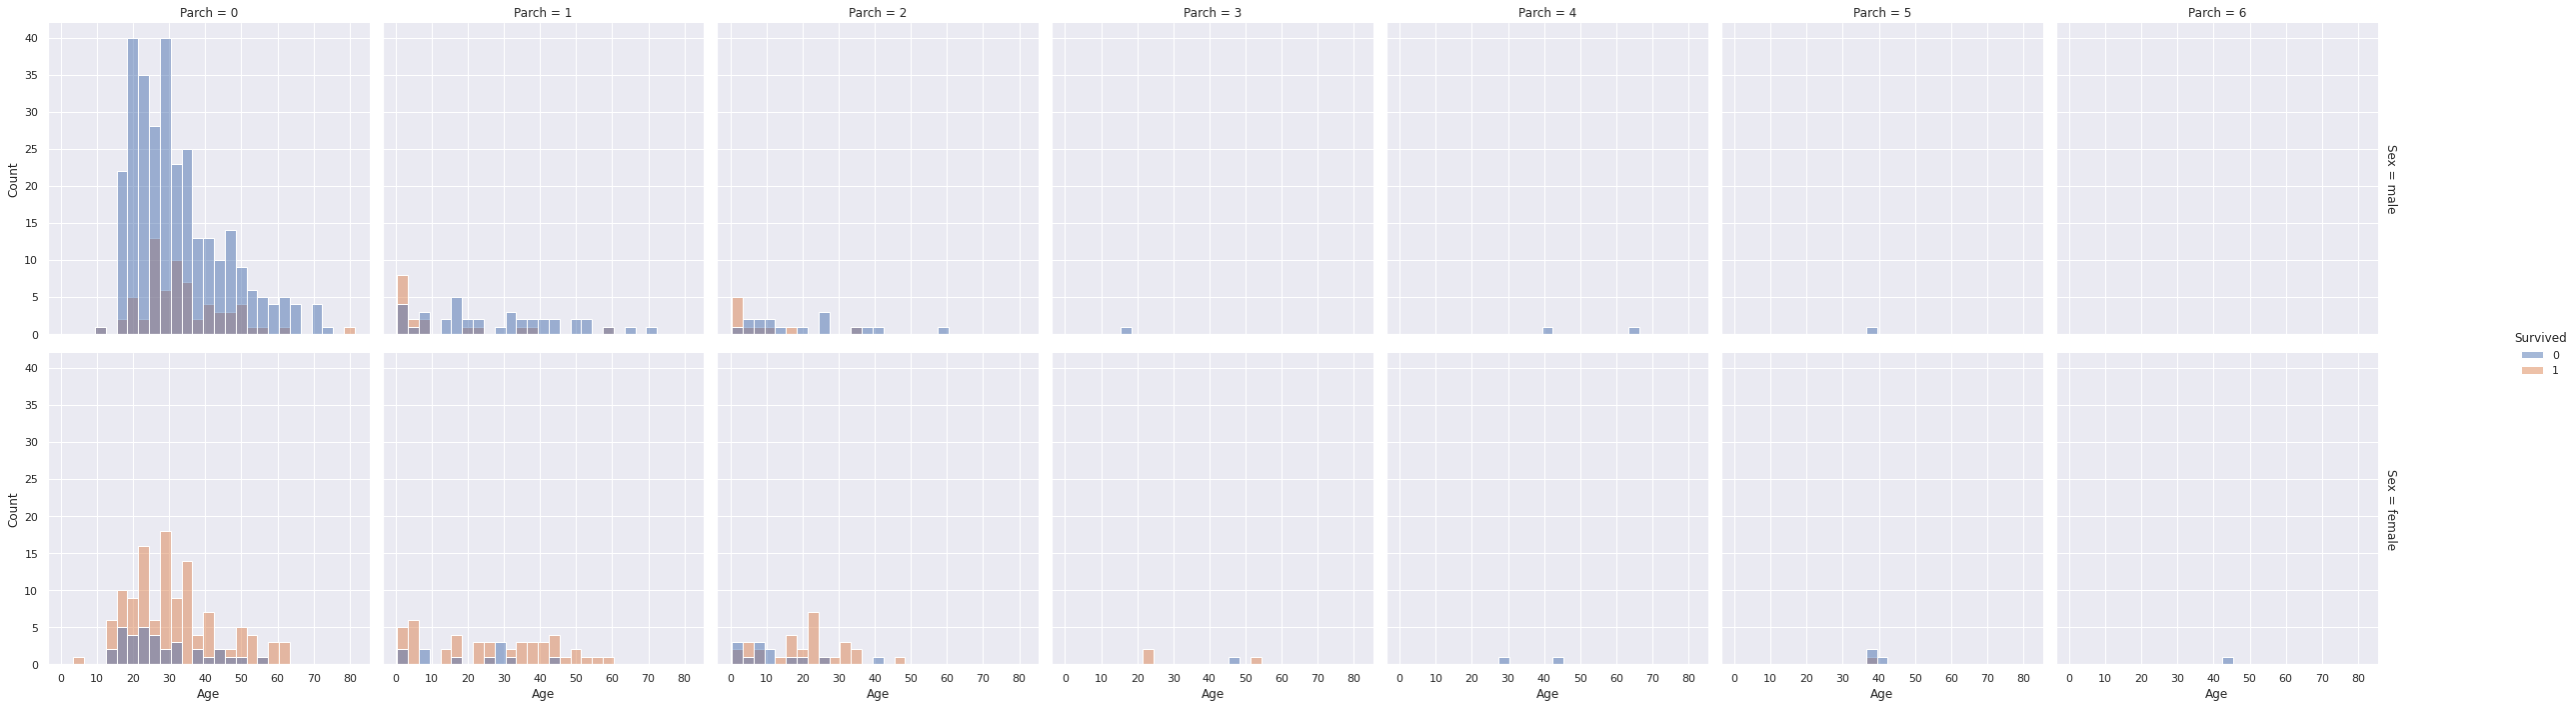

In [26]:
# Parch and Age Relations with respect to Survival
sns.displot(data = train_df , x = 'Age' , col = 'Parch', row='Sex',hue = 'Survived', binwidth=3,height = 5,facet_kws=dict(margin_titles=True) )

We got a very interesting analysis from the above visualisation:
1. Most of the passengers that had 0 relations as 'Parch' were about the 20 - 40 years for both male and female. 
2. However as we know that probabilty of survival for females was much more than the males.

## 3. Fare

In [27]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this we get to know few things about Fare. 
1. The average mean of fare was 32 dollars
2. The maximum fare was 512 dollars.
3. The data is in float, we will convert it into integer later on.

          Fare       Age
Fare  1.000000  0.096067
Age   0.096067  1.000000


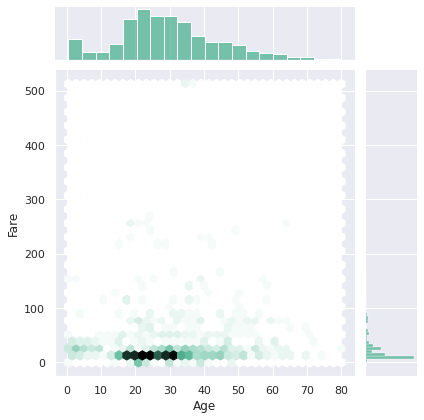

In [29]:
# Fare and Age Relation 
print(train_df[['Fare', 'Age']].corr())
sns.jointplot(data = train_df, x = 'Age' , y = 'Fare' , kind='hex',color = '#4CB391')

The above jointplot shows that passengers aged between 18 -32 years have low fares charged. But the highest fare that was charged to a passenger of about 30 to 35 years.

<function matplotlib.pyplot.show(close=None, block=None)>

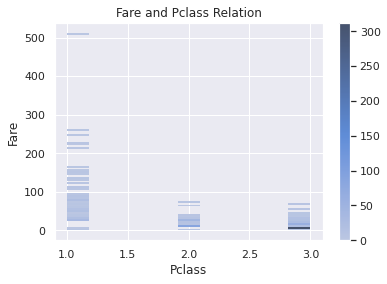

In [30]:
# Fare and Pclass
sns.histplot(data=train_df, x = 'Pclass' , y = 'Fare', cbar = True)
plt.title("Fare and Pclass Relation")
plt.show

From this, we observe that maximum number of **higher fares were charged on P class category 1**. Also it is evident that the highest fare was charged to a category 1 of Pclass.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

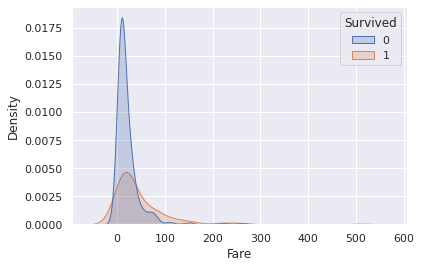

In [31]:
# Fare and Survived Relation

sns.kdeplot(data = train_df, x= 'Fare' , hue = 'Survived', shade = 'fill')

**This relation does not have very useful information, however we do get to know the fact the survival chance increased for those who have paid more fare.**

### 4. Pclass

In [32]:
# Getting basic info on Pclass
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

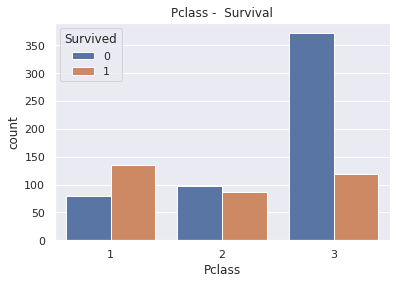

In [33]:
# Pclass and Survival Relation
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived') 
plt.title('Pclass -  Survival')
plt.show()

It is very from the above plotting that passengers from Pclass 1 were able to survive more than any other Pclass' passengers. 
This means that Priority was given to those who were in Pclass 1.

#### Pclass, SibSp, Sex relation

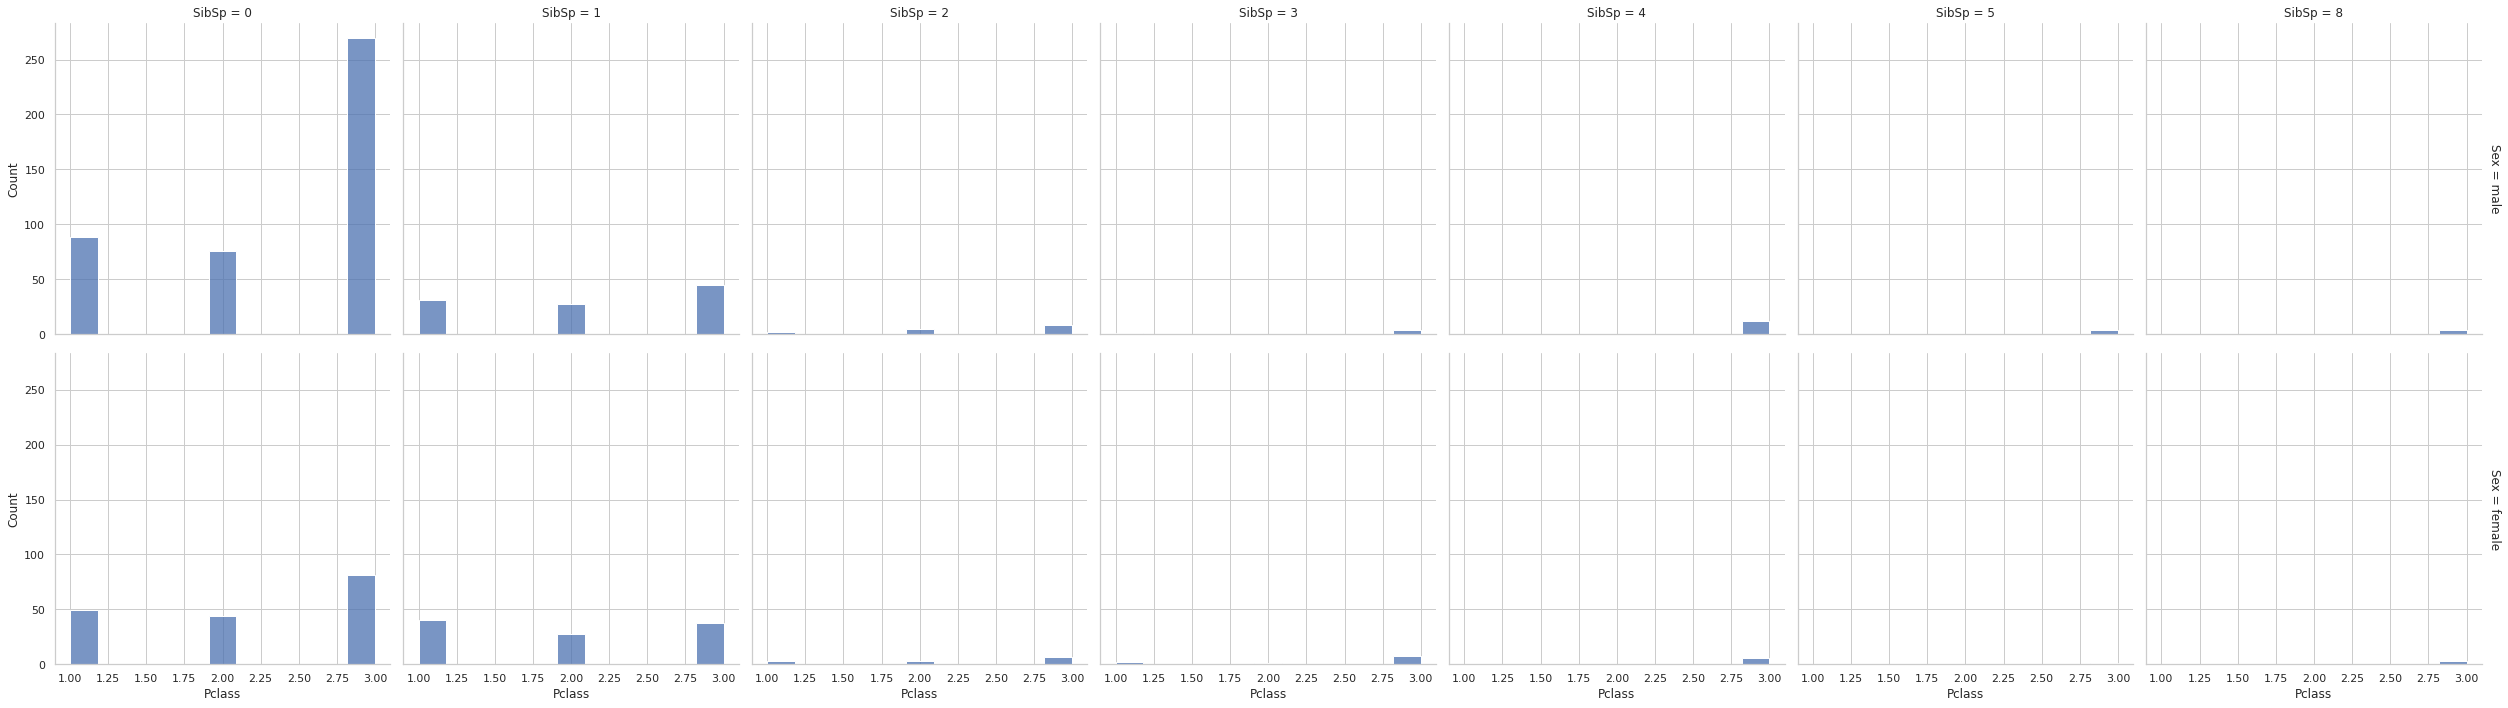

In [34]:
sns.set_style('whitegrid')
sns.displot(data = train_df, x = 'Pclass' , col = 'SibSp' , row = 'Sex' , facet_kws=dict(margin_titles=True) )

These features does not a significant relations between each other, we can only there was a higher numbers of males that were boarded on Pclass3 in terms of probabilty than female.

### Pclass and Age


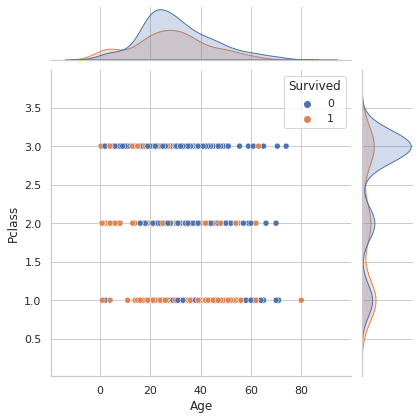

In [35]:
sns.jointplot(data = train_df, y = 'Pclass' , x = 'Age',hue = 'Survived',  color= 'green')

Observations made from the above plotting:
1. Passengers aged between 10 to 40 years were boarded on the Pclass 3.
2. Passengers of age 80 was boarded on the Pclass 1 had survived the Titanic Disaster.
3. There were far less passengers that boarded on the Pclass 2.

We want to get more clear realations between age and Pclass using boxplot. 

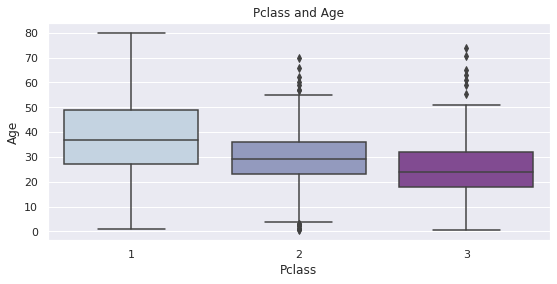

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize = (9,4))
sns.boxplot(data = train_df, x='Pclass', y='Age' , palette = 'BuPu')
plt.title('Pclass and Age')
plt.show()

Observations : 
1. The mean age of passengers of Pclass 1 is around **37**.
2. The mean age of passengers of Pclass 2 is around **29**.
3. The mean age of passengers of Pclass 3 is around **25**.

This is a very useful information as we can fill the missing values in age using these infos.

## 4. Embarked

In [37]:
# Getting basic info on Embarked column.
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

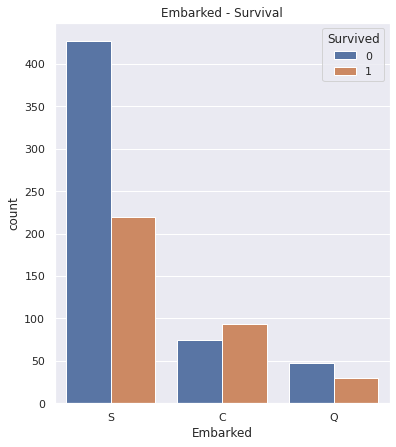

In [38]:
plt.figure(figsize = (6,7))
sns.countplot(data = train_df, x= 'Embarked' , hue = 'Survived')
plt.title('Embarked - Survival')
plt.show()


Clearly we can see that **passengers embarked from port C were able to survive *more than any other passengers from other ports***

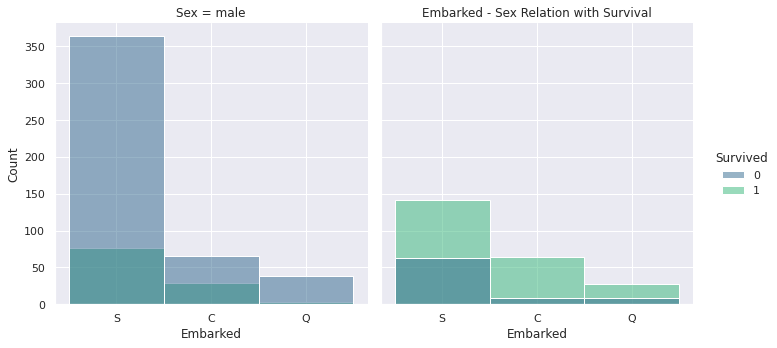

In [39]:
sns.displot(data = train_df , col = 'Sex', x='Embarked' , hue='Survived' , palette = 'viridis', col_wrap = 2, facet_kws=dict(margin_titles = True))
plt.title('Embarked - Sex Relation with Survival')
plt.show()

# Data Cleaning

### First We will look into null data of the dataset again.

<AxesSubplot:>

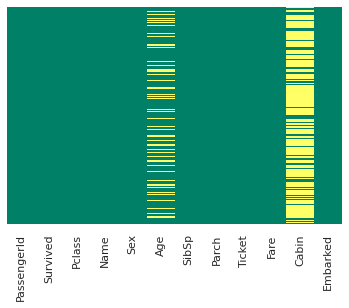

In [40]:
sns.set_style('white')
sns.heatmap(train_df.isna(), yticklabels=False, cbar = False, cmap = 'summer')

Clearly, for handling missing values, there are 2 features that need to be taken care of : Age and Cabin. 

Cabin has a large number of missing values. We will dispose of it and the column Age will filled with the mean values that were derived from relation with Pclass.

In [41]:
train_df.drop('Cabin', axis =1, inplace = True)

<AxesSubplot:>

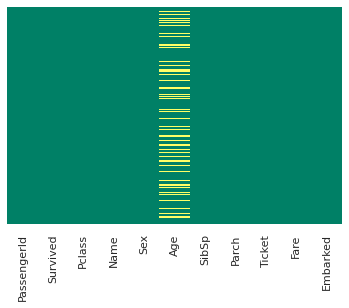

In [42]:
sns.heatmap(train_df.isna(), yticklabels=False, cbar = False, cmap = 'summer')

In [43]:
# For column "Age":
def fill_age(cols):
    Pclass = cols[1]
    Age = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 25
    else:
        return Age
    


In [44]:
train_df['Age'] = train_df[['Age','Pclass']].apply(fill_age, axis =1)

<AxesSubplot:>

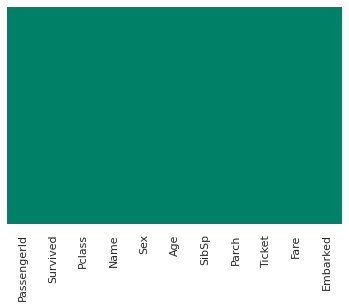

In [45]:
sns.heatmap(train_df.isna(), yticklabels=False, cbar = False, cmap = 'summer')

Finally, we cleared all the missing values in the column features.

### Data Preprocessing

We try to label encode the embarked classes to make it more effective for Machine Learning

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])


In [47]:
train_df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

#### Converting Age and Fare columns into dtype int

In [48]:
train_df['Age'] = train_df['Age'].astype(int)
train_df['Fare'] = train_df['Fare'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 76.7+ KB


We also observe that ticket column has complex values / informations that may hinder the Machine Learning, hence we will drop it.

In [49]:
train_df.drop('Ticket', axis =1, inplace = True)

In [50]:
# LabelEncoding Sex column
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,13,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25,1,2,23,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,30,0


## Test Dataset : Data Preprocessing

In [51]:
# We will handle all the data preprocessing in test dataset.
test_df.drop('Cabin', axis =1, inplace = True) # Dropping the Cabin column
test_df['Age'] = test_df[['Age','Pclass']].apply(fill_age, axis =1) # Handling missing values in Age column
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,2


In [52]:
# Changing Age and Fare into dtype as int
## Droping Ticket column from the test dataset

test_df['Age'] = test_df['Age'].astype(int)
test_df['Fare'] = test_df['Fare'].dropna().astype(int)
test_df.drop('Ticket', axis =1, inplace = True)

In [53]:
# LabelEncoding Sex column
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34,0,0,7.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,7.0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,9.0,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,8.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,12.0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,25,0,0,8.0,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,108.0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,7.0,2
416,1308,3,"Ware, Mr. Frederick",1,25,0,0,8.0,2


In [54]:
train_df.drop('Name', axis =1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

# Machine Learning

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(train_df.drop('Survived', axis =1 ), train_df['Survived'], test_size = 0.30, random_state = 101) 

## We will use RandomForest Classifier for training the model.

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 15, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [57]:
predictions = rf.predict(X_test)

In [58]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[138,  16],
       [ 35,  79]])

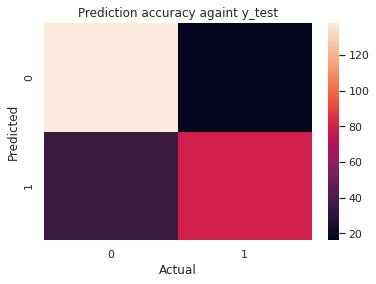

In [60]:
sns.heatmap(accuracy)
plt.title('Prediction accuracy againt y_test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

This shows a very significant view that prediction was **worse** when the **predicted survival is given 0**, however the **actual survival probability was 1**.

In [61]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8097014925373134

We got around **81%** of accuracy, which is pretty good...We could improve the accuracy using hyperparameter tuning or increasing n_estimators. We have carried out the Machine Learning process using **RandomForesrtClassifier**. 

## That is all for the the titanic dataset analysis however we have a lot more room to improve the analysis and thereby predictions.